In [45]:
import pandas as pd
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import SMOTE 
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.decomposition import PCA

# Data Exploration

## Read in data into a pandas dataframe

In [2]:
file = 'bank-additional-full.csv'

bank_data = pd.read_csv(file, sep=";")

In [3]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
categorical_vars = bank_data.describe(include=["object"]).columns
numerical_vars = bank_data.describe().columns


## Look for null/nan values

In [6]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Look at the Y column

In [7]:
value_counts_y = bank_data.y.value_counts()
value_counts_y_percentage = (value_counts_y / len(bank_data))
print(value_counts_y_percentage)

no     0.887346
yes    0.112654
Name: y, dtype: float64


There are a lot more no's then yes

# Numerical data exploration

In [8]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


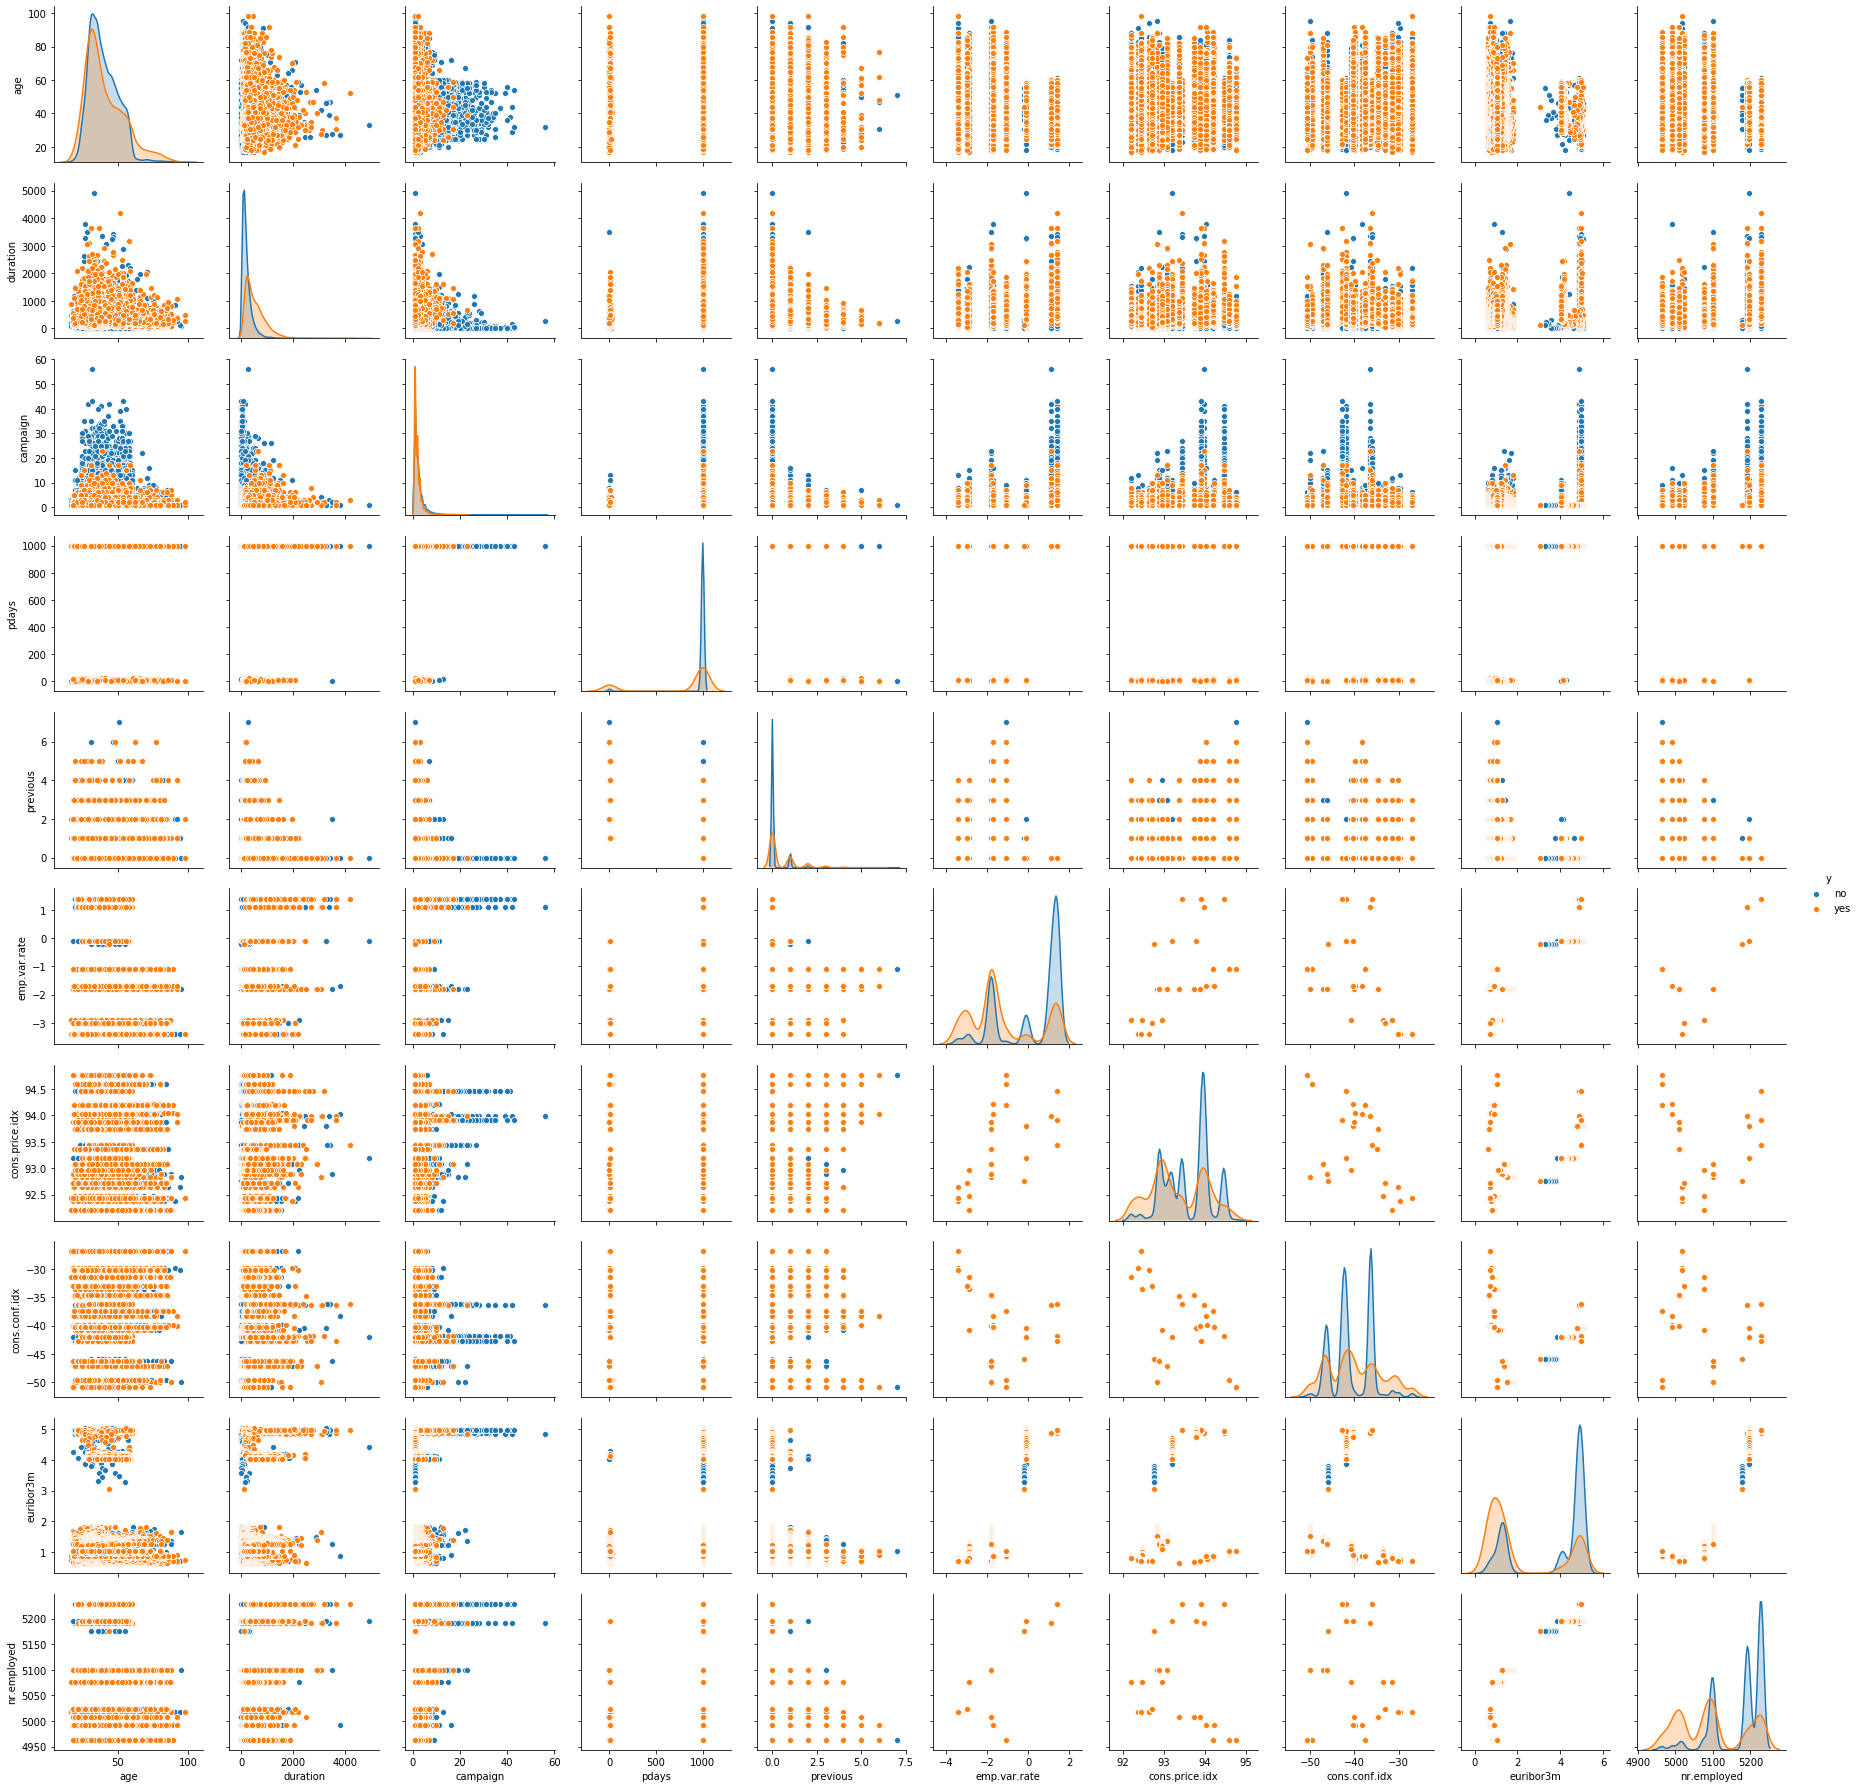

In [9]:
sns.pairplot(bank_data, hue='y')

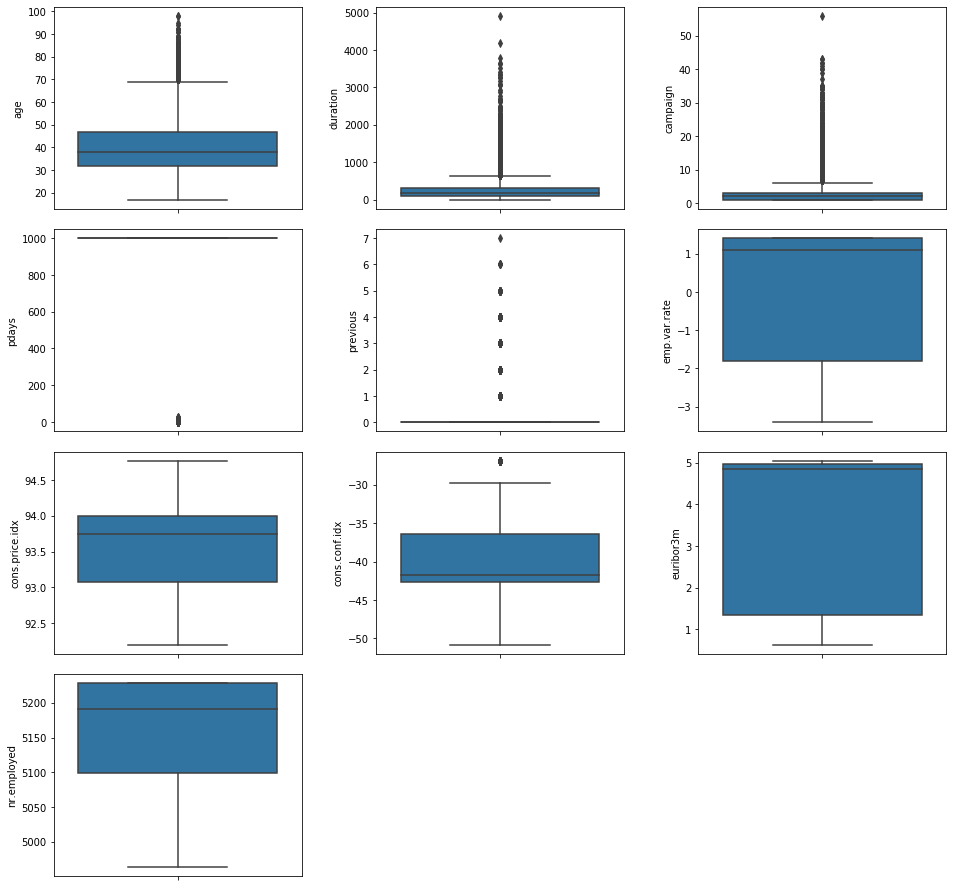

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(wspace=0.3, hspace=0.1)
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.boxplot(y = numerical_vars[i], data=bank_data, ax=ax)

age duration campaign pdays previous and cons.conf.idx all have outliers

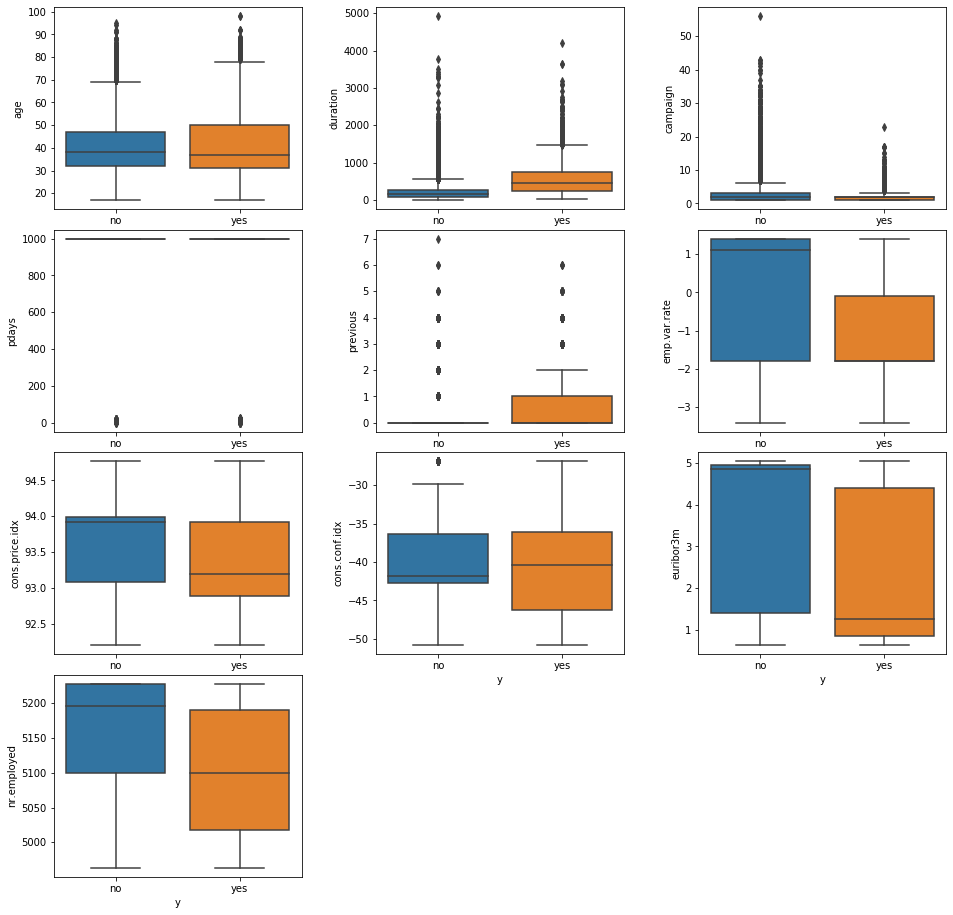

In [11]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(wspace=0.3, hspace=0.1)
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.boxplot(y = numerical_vars[i], x = 'y', data=bank_data, ax=ax)

# Categorical data exploration

In [12]:
for i in range(len(categorical_vars)):
    print(bank_data[categorical_vars[i]].value_counts())
    print('\n')

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


no         32588
unknown     8597
yes            3
Name: default, dtype: int64


yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


cellular     26144
telephone    15044
Name: contact, dtype: int64


may    13769
jul     717

job, marital status, education, default, housing, and loan all have unknowns in their data
job is hard to replace as its spread across many values and would likely not work with fitting to 1 data value
marital status has a very low number of unknowns we could assume married but unknown might be going through tranistion
education is another one spread across a number of potential values
default has more unknowns then yes's so it might work as its own value
housing is a pretty balanced category
loan we could assume no

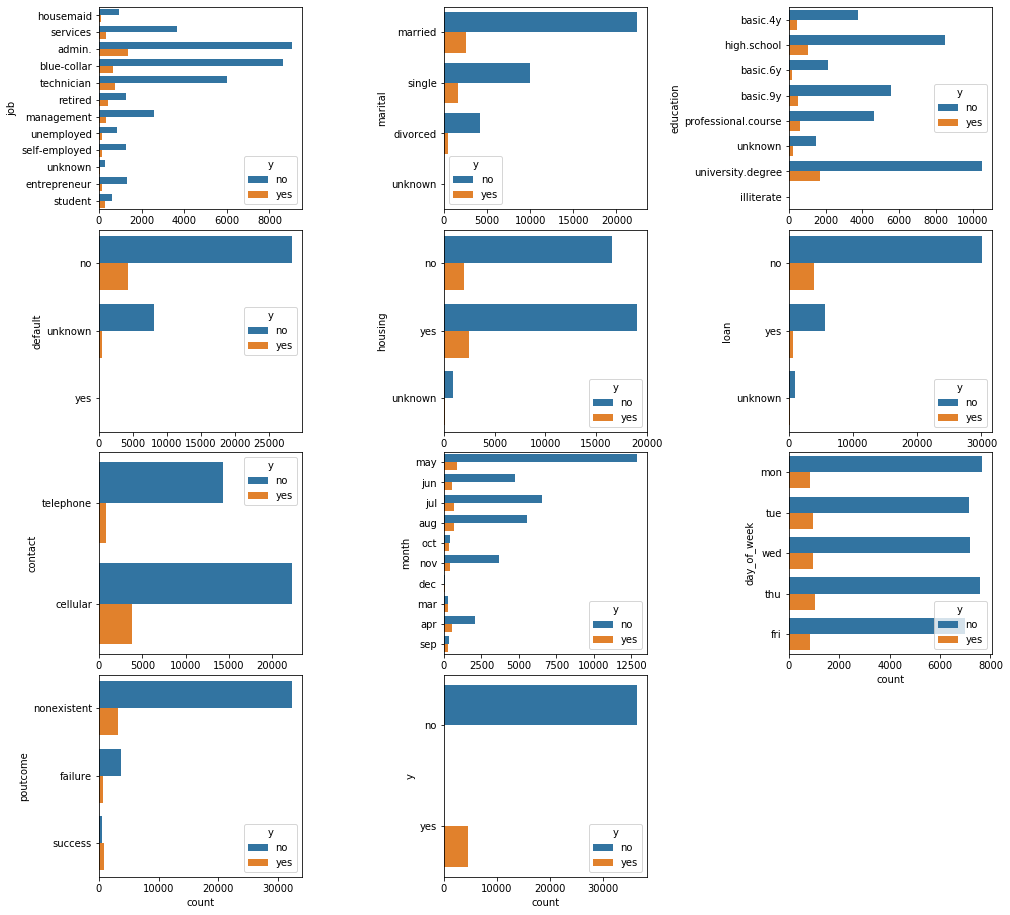

In [13]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(wspace=0.7, hspace=0.1)
for i, ax in enumerate(axes.ravel()):
    if i > 10:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], hue='y', data=bank_data, ax=ax)

None of the data is continuous so lets use dummy variables instead of encoding

# Setting up the data

In [14]:
x = bank_data
x = x.drop(columns=['y'])
y = bank_data['y']

convert the y to a binary classification

create dummy variables to express the categorical data

In [15]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
x_dummies = pd.get_dummies(x)

In [16]:
print(x_dummies.head())
print('\n')
print(y[:5])

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_oct  month_sep  \
0          -36.4      4.857       5191.0  ...          0          0   
1          -36.4      4.857       5191.0  ...          0          0   
2          -36.4      4.857       5191.0  ...          0          0   
3          -36.4      4.857       5191.0  ...          0          0   
4          -36.4      4.857       5191.0  ...          0          0   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                0                1  

# Modeling

In [17]:
def print_seperator():
    print("============================================================================================")

def pretty_print(table):
    print(pd.DataFrame(table, columns=['Model', 'Acc', 'Runtime', 'AUC']))
    

Create train test sets

In [18]:
test_size = 0.30
seed = 3
X_train, X_test, Y_train, Y_test = train_test_split(x_dummies, y, test_size=test_size, random_state=seed)

## Baseline

In [19]:
def run_model(model, name=None, table=None):
    start_time = time.time()
    model.fit(X_train, Y_train)
    total_time = time.time() - start_time
    Y_pred = model.predict(X_test)
    Y_prob = model.predict_proba(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_prob[:,1])
    auc = metrics.auc(fpr, tpr)
    table.append({'Model':name, 'Acc': accuracy, 'Runtime': total_time, 'AUC':auc})
    print('Model: {}', name)
    print('Accuracy: {}', accuracy)
    print('Time: {}', total_time)
    print('AUC: {}', auc)
    print(metrics.confusion_matrix(Y_test, Y_pred))
    print(metrics.classification_report(Y_test, Y_pred))
    plt.plot(fpr, tpr, label='AUC')
    plt.plot([0, 1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    print_seperator()

c:\users\alex0\anaconda3\envs\tflocal\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model: {} Logistic Regression
Accuracy: {} 0.9066925629198025
Time: {} 0.5276370048522949
AUC: {} 0.9286456046800005
[[10627   332]
 [  821   577]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10959
           1       0.63      0.41      0.50      1398

    accuracy                           0.91     12357
   macro avg       0.78      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357



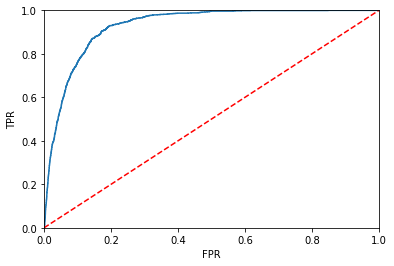

Model: {} K-NN
Accuracy: {} 0.9024034959941734
Time: {} 0.5685503482818604
AUC: {} 0.8700283707996812
[[10485   474]
 [  732   666]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10959
           1       0.58      0.48      0.52      1398

    accuracy                           0.90     12357
   macro avg       0.76      0.72      0.74     12357
weighted avg       0.90      0.90      0.90     12357



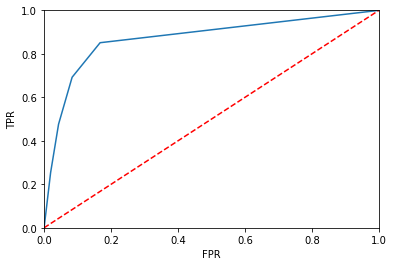

In [20]:
base_model_table = []

run_model(LogisticRegression(), "Logistic Regression", base_model_table)
run_model(KNeighborsClassifier(), "K-NN", base_model_table)


Model: {} D tree
Accuracy: {} 0.8907501820830298
Time: {} 0.3082926273345947
AUC: {} 0.7299712897898409
[[10277   682]
 [  668   730]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10959
           1       0.52      0.52      0.52      1398

    accuracy                           0.89     12357
   macro avg       0.73      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



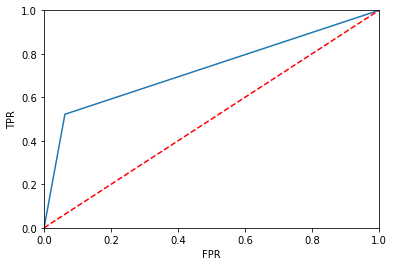

c:\users\alex0\anaconda3\envs\tflocal\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model: {} Random Forest
Accuracy: {} 0.9070971918750506
Time: {} 0.34612035751342773
AUC: {} 0.9069526735167533
[[10646   313]
 [  835   563]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10959
           1       0.64      0.40      0.50      1398

    accuracy                           0.91     12357
   macro avg       0.78      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357



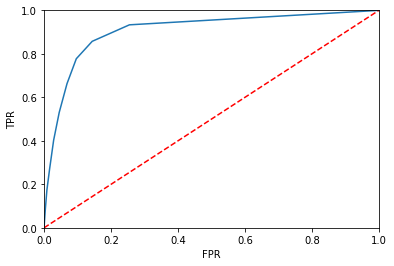

Model: {} XGBoost
Accuracy: {} 0.9151088451889617
Time: {} 7.740612983703613
AUC: {} 0.944804415364799
[[10565   394]
 [  655   743]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10959
           1       0.65      0.53      0.59      1398

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357



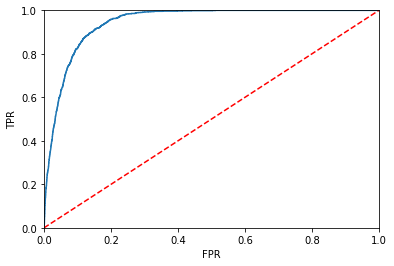

In [21]:
run_model(DecisionTreeClassifier(), "D tree", base_model_table)
run_model(RandomForestClassifier(), "Random Forest", base_model_table)
run_model(XGBClassifier(), "XGBoost", base_model_table)

In [22]:
pretty_print(base_model_table)

                 Model       Acc   Runtime       AUC
0  Logistic Regression  0.906693  0.527637  0.928646
1                 K-NN  0.902403  0.568550  0.870028
2               D tree  0.890750  0.308293  0.729971
3        Random Forest  0.907097  0.346120  0.906953
4              XGBoost  0.915109  7.740613  0.944804


Linear regression and XGBoost seem to create the highest AUC and D tree is the fastest but has poor AUC

# hyper parameter tuning xgboost

In [23]:
params = {
"max_depth"        : [ 5, 6, 7, 8, 9, 10],
"colsample_bytree" : [  0.7, 0.8, 0.9, 1 ] }

In [24]:
random_search = RandomizedSearchCV(XGBClassifier(), param_distributions=params, scoring='roc_auc', n_jobs=-1)
random_search.fit(X_train, Y_train)

c:\users\alex0\anaconda3\envs\tflocal\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
     

In [25]:
print(random_search.best_params_)

{'max_depth': 5, 'colsample_bytree': 0.8}


Model: {} XGBoost tuned
Accuracy: {} 0.9155943999352594
Time: {} 9.195393085479736
AUC: {} 0.9460542944498163
[[10543   416]
 [  627   771]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10959
           1       0.65      0.55      0.60      1398

    accuracy                           0.92     12357
   macro avg       0.80      0.76      0.77     12357
weighted avg       0.91      0.92      0.91     12357



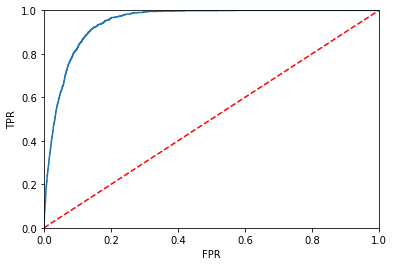

In [26]:
run_model(random_search.best_estimator_, "XGBoost tuned", base_model_table)

In [27]:
pretty_print(base_model_table)

                 Model       Acc   Runtime       AUC
0  Logistic Regression  0.906693  0.527637  0.928646
1                 K-NN  0.902403  0.568550  0.870028
2               D tree  0.890750  0.308293  0.729971
3        Random Forest  0.907097  0.346120  0.906953
4              XGBoost  0.915109  7.740613  0.944804
5        XGBoost tuned  0.915594  9.195393  0.946054


# Deal with data imbalance

In [28]:
smote = SMOTE(random_state=3)
X_smote, Y_train = smote.fit_sample(X_train, Y_train)
X_train = pd.DataFrame(X_smote, columns=x_dummies.columns)


c:\users\alex0\anaconda3\envs\tflocal\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model: {} Logistic Regression smote
Accuracy: {} 0.85773245933479
Time: {} 1.7073495388031006
AUC: {} 0.9330381637057671
[[9367 1592]
 [ 166 1232]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10959
           1       0.44      0.88      0.58      1398

    accuracy                           0.86     12357
   macro avg       0.71      0.87      0.75     12357
weighted avg       0.92      0.86      0.88     12357



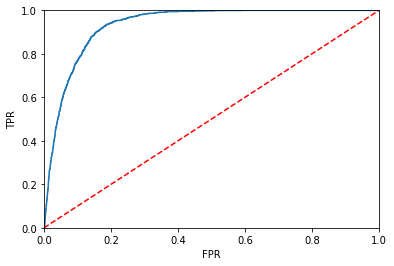

Model: {} K-NN smote
Accuracy: {} 0.8466456259609938
Time: {} 1.2797796726226807
AUC: {} 0.8789323804253621
[[9359 1600]
 [ 295 1103]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     10959
           1       0.41      0.79      0.54      1398

    accuracy                           0.85     12357
   macro avg       0.69      0.82      0.72     12357
weighted avg       0.91      0.85      0.87     12357



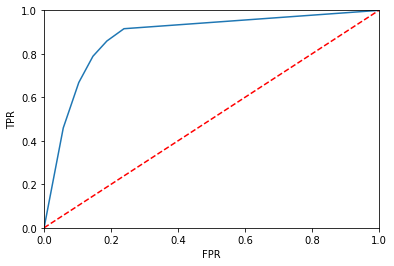

In [29]:
run_model(LogisticRegression(), "Logistic Regression smote", base_model_table)
run_model(KNeighborsClassifier(), "K-NN smote", base_model_table)


Model: {} D tree smote
Accuracy: {} 0.8853281540827062
Time: {} 1.0597052574157715
AUC: {} 0.7244182080144997
[[10218   741]
 [  676   722]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10959
           1       0.49      0.52      0.50      1398

    accuracy                           0.89     12357
   macro avg       0.72      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



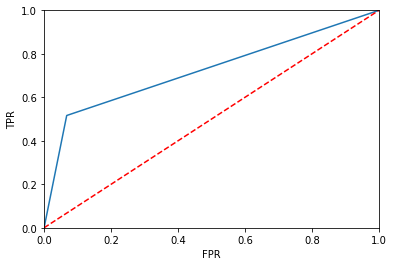

c:\users\alex0\anaconda3\envs\tflocal\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model: {} Random Forest smote
Accuracy: {} 0.9004612770089827
Time: {} 0.8061428070068359
AUC: {} 0.9035040998827597
[[10586   373]
 [  857   541]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10959
           1       0.59      0.39      0.47      1398

    accuracy                           0.90     12357
   macro avg       0.76      0.68      0.71     12357
weighted avg       0.89      0.90      0.89     12357



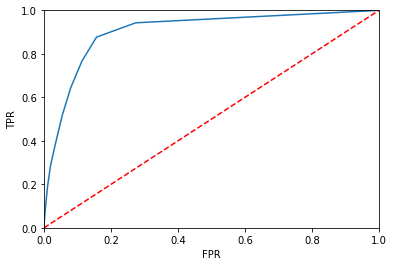

Model: {} XGBoost smote
Accuracy: {} 0.908877559278142
Time: {} 15.016398668289185
AUC: {} 0.9395719459486203
[[10376   583]
 [  543   855]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10959
           1       0.59      0.61      0.60      1398

    accuracy                           0.91     12357
   macro avg       0.77      0.78      0.78     12357
weighted avg       0.91      0.91      0.91     12357



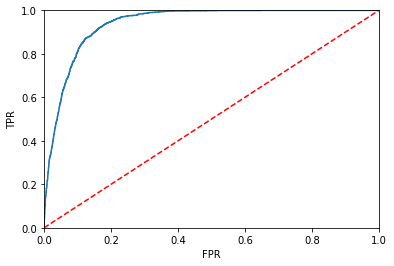

In [30]:
run_model(DecisionTreeClassifier(), "D tree smote", base_model_table)
run_model(RandomForestClassifier(), "Random Forest smote", base_model_table)
run_model(XGBClassifier(), "XGBoost smote", base_model_table)

c:\users\alex0\anaconda3\envs\tflocal\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 10, 'colsample_bytree': 0.9}
Model: {} XGBoost tuned smote
Accuracy: {} 0.9086347819049931
Time: {} 42.22308278083801
AUC: {} 0.9430326926699477
[[10457   502]
 [  627   771]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10959
           1       0.61      0.55      0.58      1398

    accuracy                           0.91     12357
   macro avg       0.77      0.75      0.76     12357
weighted avg       0.91      0.91      0.91     12357



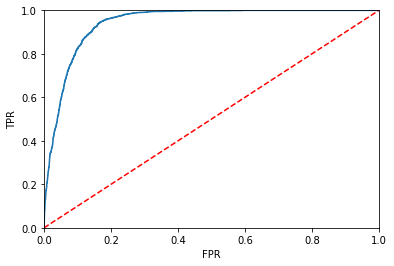

In [31]:
random_search = RandomizedSearchCV(XGBClassifier(), param_distributions=params, scoring='roc_auc', n_jobs=-1)
random_search.fit(X_train, Y_train)
print(random_search.best_params_)
run_model(random_search.best_estimator_, "XGBoost tuned smote", base_model_table)

In [32]:
pretty_print(base_model_table)

                        Model       Acc    Runtime       AUC
0         Logistic Regression  0.906693   0.527637  0.928646
1                        K-NN  0.902403   0.568550  0.870028
2                      D tree  0.890750   0.308293  0.729971
3               Random Forest  0.907097   0.346120  0.906953
4                     XGBoost  0.915109   7.740613  0.944804
5               XGBoost tuned  0.915594   9.195393  0.946054
6   Logistic Regression smote  0.857732   1.707350  0.933038
7                  K-NN smote  0.846646   1.279780  0.878932
8                D tree smote  0.885328   1.059705  0.724418
9         Random Forest smote  0.900461   0.806143  0.903504
10              XGBoost smote  0.908878  15.016399  0.939572
11        XGBoost tuned smote  0.908635  42.223083  0.943033


after balancing the train data the change is AUC is mixed, xgboost went down while logistic regression went up

# Use PCA to dimension reduce

[11.99 19.82 27.   33.88 39.24 43.79 48.09 52.26 56.03 59.46 62.84 66.05
 69.22 72.29 74.84 77.24 79.53 81.69 83.65 85.37 86.82 88.11 89.32 90.44
 91.55 92.62 93.52 94.35 95.11 95.83 96.44 97.   97.44 97.83 98.2  98.53
 98.81 99.06 99.28 99.44 99.58 99.71 99.79 99.84 99.88 99.92 99.95 99.96
 99.97 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98
 99.98 99.98 99.98]


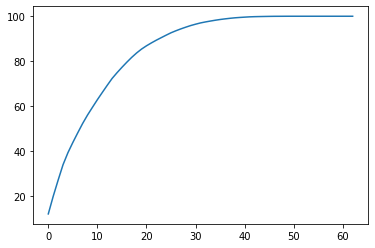

In [36]:
scaler = MinMaxScaler()
x_normed = scaler.fit_transform(x_dummies)
pca = PCA(n_components=63)
pca.fit(x_normed)
var= pca.explained_variance_ratio_

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var)
plt.plot(var)

c:\users\alex0\anaconda3\envs\tflocal\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model: {} Logistic Regression PCA
Accuracy: {} 0.9068544145019017
Time: {} 0.7161886692047119
AUC: {} 0.93005931459187
[[10667   292]
 [  859   539]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10959
           1       0.65      0.39      0.48      1398

    accuracy                           0.91     12357
   macro avg       0.79      0.68      0.72     12357
weighted avg       0.89      0.91      0.90     12357



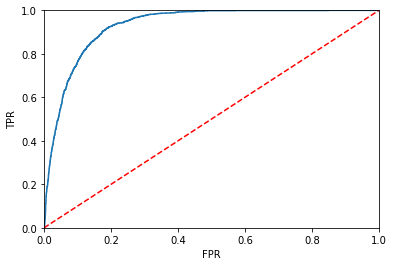

Model: {} K-NN PCA
Accuracy: {} 0.8903455531277819
Time: {} 0.11170601844787598
AUC: {} 0.7635634627753516
[[10663   296]
 [ 1059   339]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10959
           1       0.53      0.24      0.33      1398

    accuracy                           0.89     12357
   macro avg       0.72      0.61      0.64     12357
weighted avg       0.87      0.89      0.87     12357



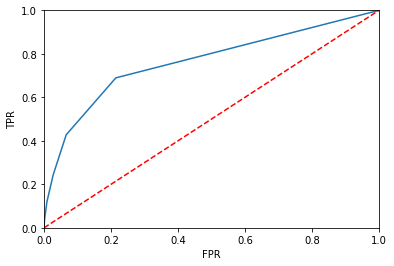

In [37]:
pca = PCA(n_components=50)
x_pca = pca.fit_transform(x_normed)
X_train, X_test, Y_train, Y_test = train_test_split(x_pca, y, test_size=test_size, random_state=seed)
run_model(LogisticRegression(), "Logistic Regression PCA", base_model_table)
run_model(KNeighborsClassifier(), "K-NN PCA", base_model_table)

Model: {} D tree PCA
Accuracy: {} 0.880634458201829
Time: {} 4.4035210609436035
AUC: {} 0.7158434265524211
[[10179   780]
 [  695   703]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10959
           1       0.47      0.50      0.49      1398

    accuracy                           0.88     12357
   macro avg       0.71      0.72      0.71     12357
weighted avg       0.88      0.88      0.88     12357



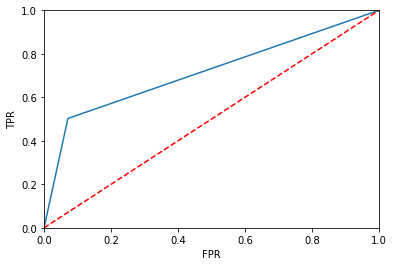

c:\users\alex0\anaconda3\envs\tflocal\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model: {} Random Forest PCA
Accuracy: {} 0.9025653475762726
Time: {} 3.176913022994995
AUC: {} 0.9008037305388885
[[10626   333]
 [  871   527]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10959
           1       0.61      0.38      0.47      1398

    accuracy                           0.90     12357
   macro avg       0.77      0.67      0.71     12357
weighted avg       0.89      0.90      0.89     12357



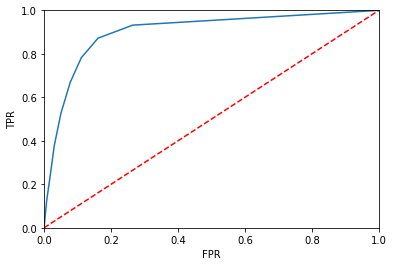

Model: {} XGBoost PCA
Accuracy: {} 0.9082301529497451
Time: {} 12.89886474609375
AUC: {} 0.9371283863211832
[[10562   397]
 [  737   661]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10959
           1       0.62      0.47      0.54      1398

    accuracy                           0.91     12357
   macro avg       0.78      0.72      0.74     12357
weighted avg       0.90      0.91      0.90     12357



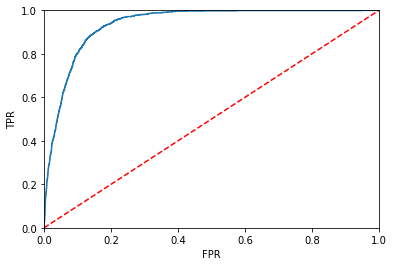

In [38]:
run_model(DecisionTreeClassifier(), "D tree PCA", base_model_table)
run_model(RandomForestClassifier(), "Random Forest PCA", base_model_table)
run_model(XGBClassifier(), "XGBoost PCA", base_model_table)

c:\users\alex0\anaconda3\envs\tflocal\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 5, 'colsample_bytree': 0.9}
Model: {} XGBoost tuned PCA
Accuracy: {} 0.9117099619648782
Time: {} 21.777687788009644
AUC: {} 0.9394295567259996
[[10545   414]
 [  677   721]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10959
           1       0.64      0.52      0.57      1398

    accuracy                           0.91     12357
   macro avg       0.79      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357



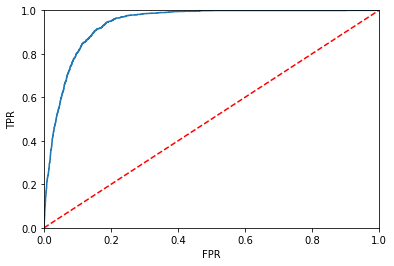

In [39]:
random_search = RandomizedSearchCV(XGBClassifier(), param_distributions=params, scoring='roc_auc', n_jobs=-1)
random_search.fit(X_train, Y_train)
print(random_search.best_params_)
run_model(random_search.best_estimator_, "XGBoost tuned PCA", base_model_table)

In [40]:
pretty_print(base_model_table)

                        Model       Acc    Runtime       AUC
0         Logistic Regression  0.906693   0.527637  0.928646
1                        K-NN  0.902403   0.568550  0.870028
2                      D tree  0.890750   0.308293  0.729971
3               Random Forest  0.907097   0.346120  0.906953
4                     XGBoost  0.915109   7.740613  0.944804
5               XGBoost tuned  0.915594   9.195393  0.946054
6   Logistic Regression smote  0.857732   1.707350  0.933038
7                  K-NN smote  0.846646   1.279780  0.878932
8                D tree smote  0.885328   1.059705  0.724418
9         Random Forest smote  0.900461   0.806143  0.903504
10              XGBoost smote  0.908878  15.016399  0.939572
11        XGBoost tuned smote  0.908635  42.223083  0.943033
12    Logistic Regression PCA  0.906854   0.716189  0.930059
13                   K-NN PCA  0.890346   0.111706  0.763563
14                 D tree PCA  0.880634   4.403521  0.715843
15          Random Fores

# Deep learning method

In [41]:
x_normed = scale(x_dummies)

In [42]:
def create_model(neurons=1, activation='relu'):
    model = tf.keras.Sequential()
    model.add(layers.Dense(neurons, input_shape=(63,), activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


started with params batch_size = [200, 350, 500] epochs = [25, 50, 75] activation = ['relu', 'sigmoid'] neurons = [10, 20, 30, 40] then adjusted grid search from there

In [43]:
model = KerasClassifier(build_fn=create_model, verbose=0)
batch_size = [300, 275, 225]
epochs = [45]
activation = ['sigmoid']
neurons = [35]
param_grid = dict(batch_size=batch_size, epochs=epochs, \
                  activation=activation, neurons=neurons)

In [46]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=1)
X_train, X_test, Y_train, Y_test = train_test_split(x_normed, y, test_size=test_size, random_state=seed)

result = grid.fit(X_train, Y_train, epochs=50, batch_size=500, shuffle=True)

c:\users\alex0\anaconda3\envs\tflocal\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   13.9s remaining:   17.3s


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   18.2s finished


In [47]:
grid.best_params_

{'activation': 'sigmoid', 'batch_size': 225, 'epochs': 45, 'neurons': 35}

Model: {} Deeplearning tuned
Accuracy: {} 0.9115481103827789
Time: {} 7.641551733016968
AUC: {} 0.9389260869718464
[[10537   422]
 [  671   727]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10959
           1       0.63      0.52      0.57      1398

    accuracy                           0.91     12357
   macro avg       0.79      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357



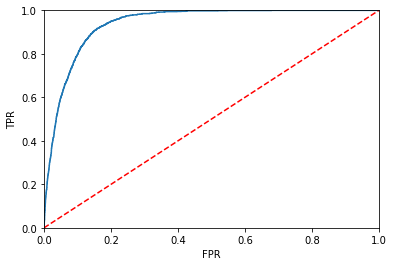

In [48]:
run_model(grid.best_estimator_, "Deeplearning tuned", base_model_table)

In [49]:
pretty_print(base_model_table)

                        Model       Acc    Runtime       AUC
0         Logistic Regression  0.906693   0.527637  0.928646
1                        K-NN  0.902403   0.568550  0.870028
2                      D tree  0.890750   0.308293  0.729971
3               Random Forest  0.907097   0.346120  0.906953
4                     XGBoost  0.915109   7.740613  0.944804
5               XGBoost tuned  0.915594   9.195393  0.946054
6   Logistic Regression smote  0.857732   1.707350  0.933038
7                  K-NN smote  0.846646   1.279780  0.878932
8                D tree smote  0.885328   1.059705  0.724418
9         Random Forest smote  0.900461   0.806143  0.903504
10              XGBoost smote  0.908878  15.016399  0.939572
11        XGBoost tuned smote  0.908635  42.223083  0.943033
12    Logistic Regression PCA  0.906854   0.716189  0.930059
13                   K-NN PCA  0.890346   0.111706  0.763563
14                 D tree PCA  0.880634   4.403521  0.715843
15          Random Fores

Tuned xgboost with no data processing has a good AUC and speed